# **BERT the entire processing**



> We try to compare each text preprocessing method, so we can find out which method is the best.




In [1]:
import pandas as pd
import numpy as np

In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

# Original dataset vs AI-Structure deletion dataset

## Original Dataset

In [3]:
df = pd.read_csv('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [4]:
#Check many possible ways that It will be null

df[df['text'].isnull()].head()

,text,label,prompt_name,source,RDizzl3_seven
44918,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44944,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45059,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45074,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45089,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [5]:
df[df['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')].head()

,text,label,prompt_name,source,RDizzl3_seven
44920,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44936,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45169,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45275,,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45475,\n\n,1,Does the electoral college work?,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [6]:
# Drop rows where 'text' is NaN or None
df = df.dropna(subset=['text'])

# Drop rows where 'text' is an empty string or whitespace
df = df[df['text'].str.strip() != '']

In [7]:
#Checking that there is no more missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65328 non-null  object
 1   label          65328 non-null  int64 
 2   prompt_name    65328 non-null  object
 3   source         65328 non-null  object
 4   RDizzl3_seven  65328 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.6+ MB


In [8]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True].shape

(0, 5)

In [9]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\n') == True].shape

(63463, 5)

In [10]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\r') == True].shape

(220, 5)

In [11]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\t') == True].shape

(1, 5)

In [12]:
#We try to replace '\n' with ' '
df['text'] = df['text'].str.replace('\n', ' ', regex=False)
df['text'] = df['text'].str.replace('\r', ' ', regex=False)
df['text'] = df['text'].str.replace('\t', ' ', regex=False)
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving Drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving Drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


In [15]:
df.iloc[32456,0]

"[Your Name] [Your Address] [City, State, ZIP Code] [Email Address] [Phone Number] [Date]  [Senator's Name] [Senator's Address] [City, State, ZIP Code]  Dear Senator [Senator's Last Name],  I am writing to express my opinion on the issue of whether to keep the Electoral College or change to a popular vote system for the election of the President of the United States. After carefully considering the information from various sources, I firmly believe that it is in the best interest of our nation to maintain the Electoral College system. Though there are arguments in favor of both systems, the Electoral College provides several important benefits that should not be overlooked.  One of the fundamental reasons to retain the Electoral College is the certainty of outcome. As stated in the passage by Judge Richard A. Posner, the winning candidate's share of the Electoral College typically exceeds their share of the popular vote. This ensures that the result of the election is decisive and mini

## AI-Structure Deletion Dataset

In [16]:
df1 = pd.read_csv('/kaggle/input/bert555/final_cleaned (1).csv')
df1.head()

,text,label,prompt_name,source
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus


In [17]:
df1.iloc[32456,0]

"Dear Senator , I am writing to express my opinion on the issue of whether to keep the Electoral College or change to a popular vote system for the election of the President of the United States. After carefully considering the information from various sources, I firmly believe that it is in the best interest of our nation to maintain the Electoral College system. Though there are arguments in favor of both systems, the Electoral College provides several important benefits that should not be overlooked. One of the fundamental reasons to retain the Electoral College is the certainty of outcome. As stated in the passage by Judge Richard A. Posner, the winning candidate's share of the Electoral College typically exceeds their share of the popular vote. This ensures that the result of the election is decisive and minimizes the possibility of lengthy legal disputes. In contrast, a direct popular vote system could lead to close elections with no clear winner, which could potentially necessit

## Training / Validation / Test set

> Original Dataset

In [18]:
df.shape

(65328, 5)

In [19]:
df[['prompt_name','source']].value_counts()

prompt_name                       source              
Facial action coding system       persuade_corpus         2167
Distance learning                 persuade_corpus         2157
Does the electoral college work?  persuade_corpus         2046
Car-free cities                   persuade_corpus         1959
Driverless cars                   persuade_corpus         1886
                                                          ... 
Seeking multiple opinions         cohere-command             1
Does the electoral college work?  mistral7binstruct_v2       1
Exploring Venus                   mistral7binstruct_v2       1
The Face on Mars                  mistral7binstruct_v1       1
                                  mistral7binstruct_v2       1
Name: count, Length: 248, dtype: int64

In [20]:
#Create the stratification key
df['stratify_key'] = df['prompt_name'].astype(str) + '_' + df['source'].astype(str) + '_' + df['label'].astype(str)

# Separate small groups with less than 2 records
group_counts = df['stratify_key'].value_counts()
small_groups = group_counts[group_counts < 2].index
df_small = df[df['stratify_key'].isin(small_groups)]
df_large = df[~df['stratify_key'].isin(small_groups)]

In [21]:
# Perform stratified sampling on the larger groups
from sklearn.model_selection import train_test_split

df_large_sample, _ = train_test_split(df_large, train_size=12492, stratify=df_large['stratify_key'], random_state=20240917)

# Combine the sampled large groups with small groups
df_sample = pd.concat([df_large_sample, df_small])

df_sample[['prompt_name','source']].value_counts()

prompt_name                       source                            
Facial action coding system       persuade_corpus                       414
Distance learning                 persuade_corpus                       412
Does the electoral college work?  persuade_corpus                       391
Car-free cities                   persuade_corpus                       375
Driverless cars                   persuade_corpus                       361
                                                                       ... 
Distance learning                 mistralai/Mistral-7B-Instruct-v0.1      1
Does the electoral college work?  chat_gpt_moth                           1
Driverless cars                   mistral7binstruct_v1                    1
                                  mistral7binstruct_v2                    1
Exploring Venus                   chat_gpt_moth                           1
Name: count, Length: 245, dtype: int64

In [22]:
# View the sampled DataFrame
df_sample = df_sample[['text','label']]
df_sample.head()

,text,label
35858,Dress codes are like super annoying you know? ...,1
55647,Introduction: The Face on Mars has been a topi...,1
51493,The facial action coding system is an innovat...,1
40823,"As a fellow citizen, I would like to inform ...",1
18475,I believe that the cars are safe to an extent....,0


In [23]:
df_sample.shape

(12500, 2)

In [24]:
# Define outcome name
outcomename = 'label'

# Redefine X and Y after sampling
X_sampled = df_sample.drop(columns=outcomename)
Y_sampled = df_sample[outcomename]

# Split into training and combined validation-test sets (80% train, 20% valid/test)
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=20240917, stratify=Y_sampled)

# Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state=20240917, stratify=y_valid_test)

In [25]:
X_train.head()

,text
55668,"""Unmasking the Face on Mars,"" an article publi..."
28254,Positive attitude is a crucial element in ach...
14471,Most people you see cleaning up the community ...
53837,"In recent years, Americans have been shifting ..."
30385,"Hey, so I'm totally stoked to be writing this ..."


> AI-Structure Deletion Dataset

In [26]:
#Create the stratification key
df1['stratify_key'] = df1['prompt_name'].astype(str) + '_' + df1['source'].astype(str) + '_' + df1['label'].astype(str)

# Separate small groups with less than 2 records
group_counts = df1['stratify_key'].value_counts()
small_groups = group_counts[group_counts < 2].index
df_small = df1[df1['stratify_key'].isin(small_groups)]
df_large = df1[~df1['stratify_key'].isin(small_groups)]

In [27]:
# Perform stratified sampling on the larger groups
from sklearn.model_selection import train_test_split

df_large_sample, _ = train_test_split(df_large, train_size=12492, stratify=df_large['stratify_key'], random_state=20240917)

# Combine the sampled large groups with small groups
df_sample = pd.concat([df_large_sample, df_small])

df_sample[['prompt_name','source']].value_counts()

prompt_name                       source                            
Facial action coding system       persuade_corpus                       414
Distance learning                 persuade_corpus                       412
Does the electoral college work?  persuade_corpus                       391
Car-free cities                   persuade_corpus                       375
Driverless cars                   persuade_corpus                       361
                                                                       ... 
Distance learning                 mistralai/Mistral-7B-Instruct-v0.1      1
Does the electoral college work?  chat_gpt_moth                           1
Driverless cars                   mistral7binstruct_v1                    1
                                  mistral7binstruct_v2                    1
Exploring Venus                   chat_gpt_moth                           1
Name: count, Length: 245, dtype: int64

In [28]:
# View the sampled DataFrame
df_sample = df_sample[['text','label']]
df_sample.head()

,text,label
35858,Dress codes are like super annoying you know? ...,1
55647,The Face on Mars has been a topic of fascinati...,1
51493,The facial action coding system is an innovati...,1
40823,"As a fellow citizen, I would like to inform yo...",1
18475,I believe that the cars are safe to an extent....,0


In [29]:
# Define outcome name
outcomename = 'label'

# Redefine X and Y after sampling
X_sampled = df_sample.drop(columns=outcomename)
Y_sampled = df_sample[outcomename]

# Split into training and combined validation-test sets (80% train, 20% valid/test)
X_train1, X_valid_test1, y_train1, y_valid_test1 = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=20240917, stratify=Y_sampled)

# Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_valid_test1, y_valid_test1, test_size=0.5, random_state=20240917, stratify=y_valid_test1)

In [30]:
X_train1.head()

,text
55668,"""Unmasking the Face on Mars,"" an article publi..."
28254,Positive attitude is a crucial element in achi...
14471,Most people you see cleaning up the community ...
53837,"In recent years, Americans have been shifting ..."
30385,"Hey, so I'm totally stoked to be writing this ..."


## BERT

In [31]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.7 MB/s eta 0:00:0000:01


In [32]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [33]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df0_dataset = CustomDataset(X_train['text'], y_train, tokenizer)
train_df1_dataset = CustomDataset(X_train1['text'], y_train1, tokenizer)

# For validation datasets
val_df0_dataset = CustomDataset(X_val['text'], y_val, tokenizer)
val_df1_dataset = CustomDataset(X_val1['text'], y_val1, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test['text'], y_test, tokenizer)
test_df1_dataset = CustomDataset(X_test1['text'], y_test1, tokenizer)

In [34]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla T4


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [35]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [36]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

### Dataset 0

In [37]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [38]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917) 

In [40]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [41]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    save_strategy="epoch", 
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1
1,No log,0.068534,0.984343
2,0.073000,0.070510,0.985705
3,0.073000,0.103844,0.980366


TrainOutput(global_step=939, training_loss=0.045803009638517175, metrics={'train_runtime': 852.9457, 'train_samples_per_second': 35.172, 'train_steps_per_second': 1.101, 'total_flos': 3974021959680000.0, 'train_loss': 0.045803009638517175, 'epoch': 3.0})

In [42]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [43]:
from transformers import AutoModelForSequenceClassification
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-626", num_labels=2)
model1.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [44]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       524
           1       0.98      1.00      0.99       726

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



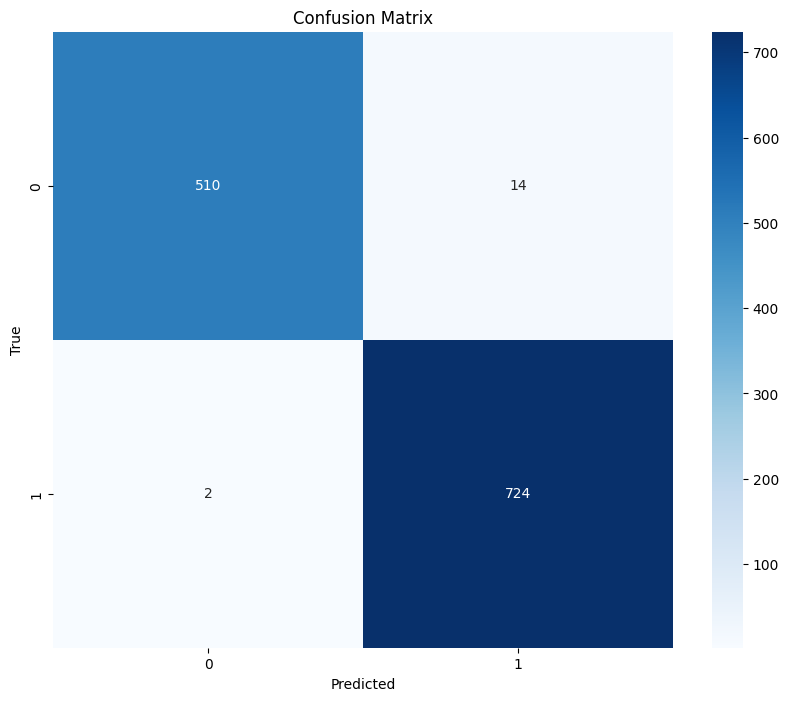

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
#from huggingface_hub import notebook_login

In [47]:
#notebook_login()

In [48]:
#model1.push_to_hub("dataset0_BERT_model")

In [49]:
!rm -rf /kaggle/working/results

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### Dataset 1

In [51]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [52]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [53]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [54]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    save_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1
1,No log,0.097259,0.977718
2,0.074800,0.081870,0.983051
3,0.074800,0.110424,0.980392


TrainOutput(global_step=939, training_loss=0.04589036021369715, metrics={'train_runtime': 856.0327, 'train_samples_per_second': 35.045, 'train_steps_per_second': 1.097, 'total_flos': 3974021959680000.0, 'train_loss': 0.04589036021369715, 'epoch': 3.0})

In [55]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [56]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-626", num_labels=2)
model1.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [57]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       524
           1       0.98      1.00      0.99       726

    accuracy                           0.99      1250
   macro avg       0.99      0.98      0.99      1250
weighted avg       0.99      0.99      0.99      1250



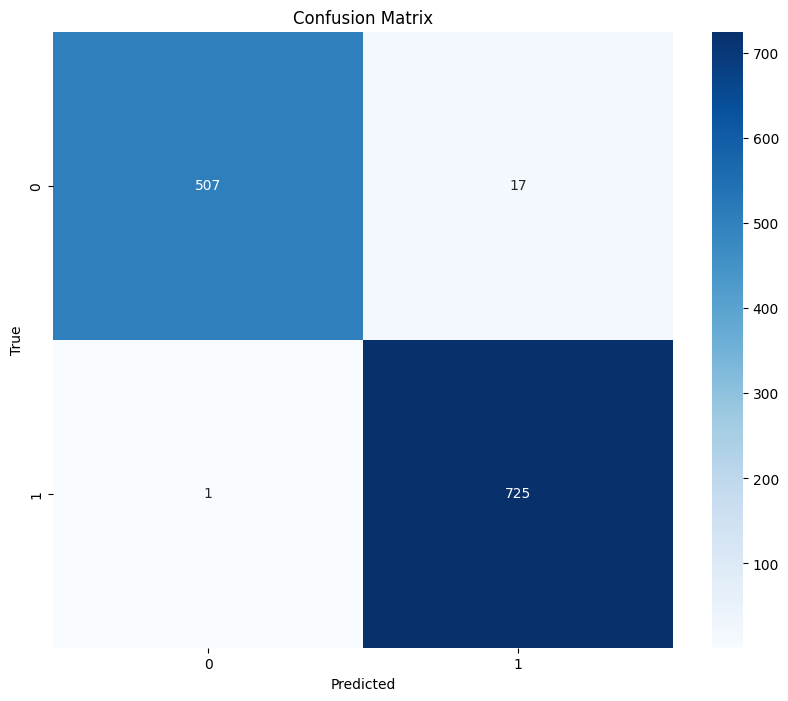

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [65]:
#model1.push_to_hub("dataset1_BERT_model")

## Other text preprocessing method


> Removing punctuation







In [ ]:
'''df2 = df1.copy()
df2.head()'''

In [ ]:
'''# Remove punctuation from the 'text' column
import string
df2['text'] = df2['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df2.head()'''

> Removing stopword

In [ ]:
#!pip install nltk

In [ ]:
'''from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk'''

In [ ]:
'''from nltk.corpus import stopwords
nltk.download('stopwords')'''

In [ ]:
'''# Initialize stopwords list
stop_words = set(stopwords.words('english'))

# Function to clean text (remove punctuation and stopwords)
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    return ' '.join(filtered_words)

# Apply the function to the 'text' column
df2['text'] = df2['text'].apply(clean_text)'''

In [ ]:
#df2.head()

> Stemming

In [ ]:
'''from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data (only needs to be run once)
nltk.download('punkt')'''

In [ ]:
'''# Initialize the stemmer
stemmer = PorterStemmer()

# Function to remove punctuation and apply stemming
def stem_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)

# Apply the function to the 'text' column
df2['text'] = df2['text'].apply(stem_text)'''

In [ ]:
#df2.head()

In [ ]:
#df2.to_csv('remove_stem.csv',index=False)

In [59]:
df2_test = pd.read_csv('/kaggle/input/bert555/remove_stem.csv')
df2_test.head()

,text,label,prompt_name,source,stratify_key
0,phone modern human today alway phone alway pho...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,essay explain driver abl use electron devic op...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,drive use cellular devic today societi thought...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,phone drive driver abl use phone oper vehicl d...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,cell phone oper drive abil stay connect peopl ...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


> Training / Validation / Test set

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your 3 DataFrames are stored in a list
dfs = [df2_test]

# Iterate over each DataFrame and process them
for i, dfs in enumerate(dfs, start=2):

    # Create the stratification key
    dfs['stratify_key'] = dfs['prompt_name'].astype(str) + '_' + dfs['source'].astype(str) + '_' + dfs['label'].astype(str)

    # Separate small groups with less than 2 records
    group_counts = dfs['stratify_key'].value_counts()
    small_groups = group_counts[group_counts < 2].index
    df_small = dfs[dfs['stratify_key'].isin(small_groups)]
    df_large = dfs[~dfs['stratify_key'].isin(small_groups)]

    # Perform stratified sampling on the larger groups
    df_large_sample, _ = train_test_split(
        df_large,
        train_size=12492,
        stratify=df_large['stratify_key'],
        random_state=20240917
    )

    # Combine the sampled large groups with small groups
    df_sample = pd.concat([df_large_sample, df_small])

    # View the sampled DataFrame
    df_sample = df_sample[['text', 'label']]

    # Define outcome name
    outcomename = 'label'

    # Redefine X and Y after sampling
    X_sampled = df_sample.drop(columns=outcomename)
    Y_sampled = df_sample[outcomename]

    # Split into training and combined validation-test sets (80% train, 20% valid/test)
    X_train2, X_valid_test2, y_train2, y_valid_test2 = train_test_split(
        X_sampled, Y_sampled, test_size=0.2, random_state=20240917, stratify=Y_sampled
    )

    # Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
    X_val2, X_test2, y_val2, y_test2 = train_test_split(
        X_valid_test2, y_valid_test2, test_size=0.5, random_state=20240917, stratify=y_valid_test2
    )

    # Assign each split to dynamically named variables (separate for features and labels)
    globals()[f'X_train_df{i}'] = X_train2
    globals()[f'y_train_df{i}'] = y_train2
    globals()[f'X_val_df{i}'] = X_val2
    globals()[f'y_val_df{i}'] = y_val2
    globals()[f'X_test_df{i}'] = X_test2
    globals()[f'y_test_df{i}'] = y_test2

# Now you have variables like X_train_df1, y_train_df1, X_val_df1, ..., X_test_df3, y_test_df3

In [61]:
X_train.head()

,text
55668,"""Unmasking the Face on Mars,"" an article publi..."
28254,Positive attitude is a crucial element in ach...
14471,Most people you see cleaning up the community ...
53837,"In recent years, Americans have been shifting ..."
30385,"Hey, so I'm totally stoked to be writing this ..."


In [62]:
X_train1.head()

,text
55668,"""Unmasking the Face on Mars,"" an article publi..."
28254,Positive attitude is a crucial element in achi...
14471,Most people you see cleaning up the community ...
53837,"In recent years, Americans have been shifting ..."
30385,"Hey, so I'm totally stoked to be writing this ..."


In [63]:
X_train_df2.head()

,text
55668,unmask face mar articl publish nasa provid evi...
28254,posit attitud crucial element achiev success l...
14471,peopl see clean commun peopl gone jail told wo...
53837,recent year american shift toward sustain way ...
30385,hey Im total stoke write essay awesom school h...


In [64]:
print(X_train.shape)
print(X_train1.shape)
print(X_train_df2.shape)

(10000, 1)
(10000, 1)
(10000, 1)


## BERT

In [65]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)

In [67]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla T4


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [68]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [69]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

### Dataset 2

In [70]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [71]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [72]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [73]:
training_args = TrainingArguments(
    save_strategy="epoch",
    eval_strategy="epoch",
    output_dir="./results2",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1
1,No log,0.111203,0.966959
2,0.170600,0.068878,0.984171
3,0.170600,0.073586,0.984869


TrainOutput(global_step=939, training_loss=0.11159121317350572, metrics={'train_runtime': 825.0835, 'train_samples_per_second': 36.36, 'train_steps_per_second': 1.138, 'total_flos': 3974021959680000.0, 'train_loss': 0.11159121317350572, 'epoch': 3.0})

In [74]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [75]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results2/checkpoint-626", num_labels=2)
model1.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [76]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       524
           1       0.99      0.98      0.98       726

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



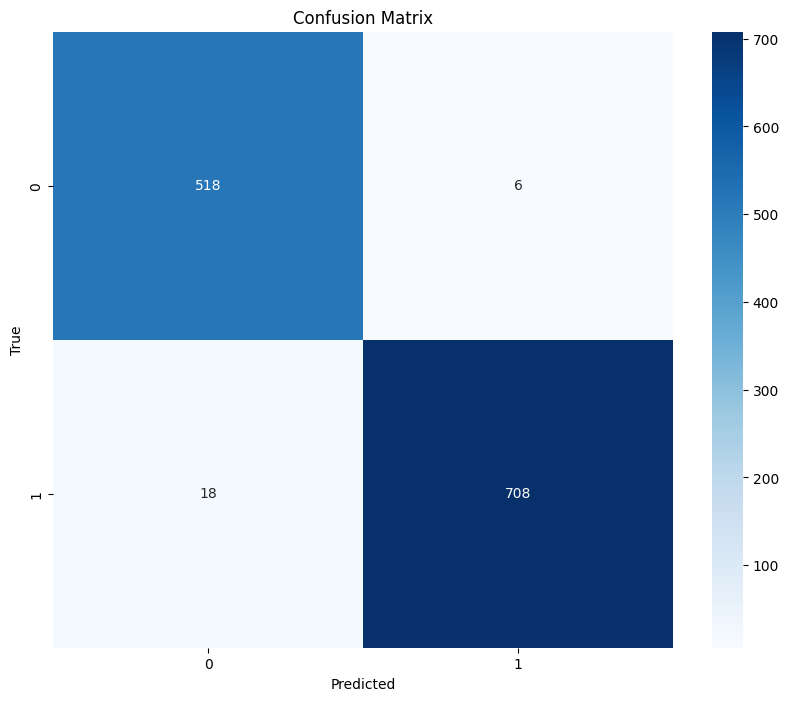

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#model1.push_to_hub("dataset2_BERT_model")

In [79]:
!rm -rf /kaggle/working/results2
!rm -rf /kaggle/working/results

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Training method

In [ ]:
#Load model directly
from transformers import BertForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

## Linear Probing (Training only classifier)

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)
    # Freeze all layers except the final classification layer
    for param in model.bert.parameters():
      param.requires_grad = False

    return model

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
from transformers import AutoModelForSequenceClassification

model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-936", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Full fine-tuning (FT)

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-936", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## PEFT (LoRA)

In [ ]:
!pip install peft

In [ ]:
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    r=32,                      # Low-rank dimension
    lora_alpha=16,            # Scaling parameter
    lora_dropout=0.1,         # Dropout probability
    target_modules=["query", "value"],  # Apply LoRA to attention "query" and "value" matrices
    bias="none",              # No bias parameters
    task_type="SEQ_CLS",      # Sequence Classification task
)

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    # Apply LoRA to the BERT model
    global lora_config
    model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)
    model = get_peft_model(model, lora_config)
    return model

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
# To load the model later:
from peft import PeftModel

loaded_peft_model = PeftModel.from_pretrained(BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2), "/content/results/checkpoint-450")
loaded_peft_model.to(device)

In [ ]:
'''from transformers import AutoModelForSequenceClassification

model1 = AutoModelForSequenceClassification.from_pretrained("/content/results/checkpoint-450", num_labels=2)
model1.to(device)'''

In [ ]:
import torch
import numpy as np

loaded_peft_model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## LP-FT

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)
    # Freeze all layers except the final classification layer
    for param in model.bert.parameters():
      param.requires_grad = False

    return model

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("/content/results/checkpoint-150", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_final",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
from transformers import AutoModelForSequenceClassification

model1 = AutoModelForSequenceClassification.from_pretrained("/content/results_final/checkpoint-150", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## EH-FT

In [ ]:
!pip install peft

In [ ]:
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    r=32,                      # Low-rank dimension
    lora_alpha=16,            # Scaling parameter
    lora_dropout=0.1,         # Dropout probability
    target_modules=["query", "value"],  # Apply LoRA to attention "query" and "value" matrices
    bias="none",              # No bias parameters
    task_type="SEQ_CLS",      # Sequence Classification task
)

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    # Apply LoRA to the BERT model
    global lora_config
    model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)
    model = get_peft_model(model, lora_config)
    return model

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_EHFT",
    learning_rate= 5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
def model_init() :
    model = AutoModelForSequenceClassification.from_pretrained("/content/results_ehft/checkpoint-150", num_labels=2)
    classifier_head = model.classifier
    # Step 3: Load a fresh BERT base model
    base_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    # Step 4: Replace the base model's classifier with the extracted classifier
    base_model.classifier = classifier_head
    return base_model

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_EHFT_final",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
from transformers import AutoModelForSequenceClassification

model1 = AutoModelForSequenceClassification.from_pretrained("/content/results_ehft_final/checkpoint-150", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Final Model